# Forecasting Malta's 2017 elections
__Ivan Debono__
June 2017

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
#Read in the poll data
file='electionpolls.csv'
data=pd.read_csv(file, parse_dates=[1], dayfirst=True)

ProbPNPD=[]
ProbPL=[]
ProbAD=[]
ProbOthers=[]

In [3]:
#PN results will be added to PD
data['PNPD']=data.PN+data.PD

In [4]:
cols = data.columns.tolist()
cols=['Year','Date','Pollster','PNPD','PL','AD','Others']
df=data[cols]

In [5]:
dAll=[]
for index, row in df.iterrows(): dAll.append(np.array(row))

## This is the key part of the calculation
We simulate 50000 draws from a Dirichlet distribution for each poll.

The probability distribution function of a Dirichlet distribution is:

$\{x_1, \dots, x_K\} \sim\frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^Kx_i^{\alpha_i - 1}$
with $K\le 2$, $x_i \in (0,1)$, and $\sum_{i=1}^Kx_i = 1$.

Our $x_i$ are the poll percentages for each party $i$.

The probability of victory for each party is the number of draws out of the total in which the simulated election is won by the respective party.

In [6]:

number= 50000

for i in range(len(dAll)):
    vector =list(dAll[i][3:7])

    random=np.random.dirichlet(vector,number)

    postn=[]
    for i in range(number): postn.append(random[i].argmax(axis=0))
    postn=np.array(postn)
    
    PNPD=100*len(np.where(postn ==0)[0])/number
    ProbPNPD.append(PNPD)
    
    PL=100*len(np.where(postn ==1)[0])/number
    ProbPL.append(PL)
    
    AD=100*len(np.where(postn ==2)[0])/number
    ProbAD.append(AD)
    
    Others=100*len(np.where(postn ==3)[0])/number
    ProbOthers.append(Others)

#Probability of victory for each party
    setprint=False
    if setprint == True:
        print('PNPD',PNPD,'%')
        print('PL',PL,'%')
        print('AD',AD,'%')
        print('Others',Others,'%')

We make the March 2013 entry the actual election result, i.e. this is equivalent to a poll with 100% certainty

In [7]:
ProbPNPD[-1]=0
ProbPL[-1]=100

#### Now we can plot the graph tracking probabilities since 2013

We have an actual election in March 2013 (first data point), so the results are $100\%$ certain (i.e. $100\%$  probability of victory for the winning party, and $0\%$ for the others.

I have used the European election of May 2014 as a poll for the general election, so the actual results are included with polls.

<IPython.core.display.Javascript object>


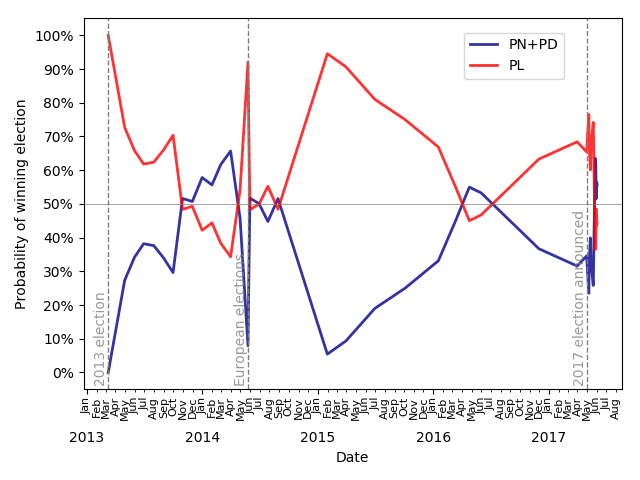

In [8]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

x=pd.to_datetime(df.Date)
fig, ax = plt.subplots()
ax.xaxis_date()

fmt = '%.0f%%' # Format for ticks e.g. '40%'

import matplotlib.dates as mdates
    
years = mdates.YearLocator()
months = mdates.MonthLocator()
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')  # add some space for the year label
    

ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90,size=8)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


plt.plot(x,ProbPNPD,linestyle='-',color='darkblue',linewidth=2,label='PN+PD',alpha=0.8)
plt.plot(x,ProbPL,linestyle='-',color='red',linewidth=2,label='PL',alpha=0.8)
#plt.plot(x,ProbAD,linestyle='-',color='green',linewidth=2,label='AD',alpha=0.8)
#AD's chances are zero in any simulation. I am not plotting their probability or it would needlessly clutter the graph
plt.legend(bbox_to_anchor=(0.3, 0.9, 1, 0), loc='center',
           ncol=1, mode="compact", borderaxespad=0)
plt.axhline(y=50,linewidth=0.5, color = 'gray')
plt.yticks(np.arange(0,110,10))
plt.xlabel('Date')
plt.ylabel('Probability of winning election')

label_list = [
    (pd.to_datetime('2017-05-01'), '2017 election announced', 'grey'),
    (pd.to_datetime('2013-03-09'), '2013 election', 'grey'),
    (pd.to_datetime('2014-05-24'), 'European elections', 'grey')
]
ax = plt.gca()

for date_point, label, clr in label_list:
    plt.axvline(x=date_point, color=clr,linestyle='--', linewidth=1)
    plt.text(date_point, ax.get_ylim()[1]-109, label,
             horizontalalignment='right',
             verticalalignment='bottom',
             rotation=90,
             color=clr,
            alpha=0.8)
    
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
plt.tight_layout()
plt.show()

## What the results tell us

Labour's chances were always better than the Nationalist Party's (later the Nationalist Party + Democratic Party) throughout 2013-2017, except for two brief periods around January 2014 and May 2016. The first coincides with the announcement of the sale-of-passport programme by the Maltese government, and the media story which followed. The second coincides with the Panama Papers leak.

### Are European elections a useful test for governing parties?

Yes and no. Labour was trailing the Nationalist Party (the Democratic Party hadn't been set up yet) right up to April 2014. But it ended up polling $53.4\%$ to the Nationalist Party's $40.0\%$. European and general elections are fought on different platforms. The candidates are different, the issues are different, and, significantly, the party leaders (in this case, the Prime Minister and Leader of the Opposition) do not stand for election. The voters are also different. EU citizens are on the voting register for European elections, but not for general elections. I could not find any reliable data on voters in either election. This question deserves to be looked at.